<a href="https://colab.research.google.com/github/21-501/ds1/blob/main/i2code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

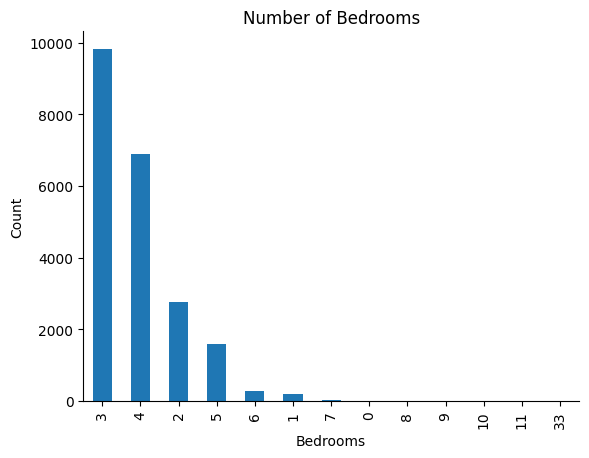

<Figure size 1000x1000 with 0 Axes>

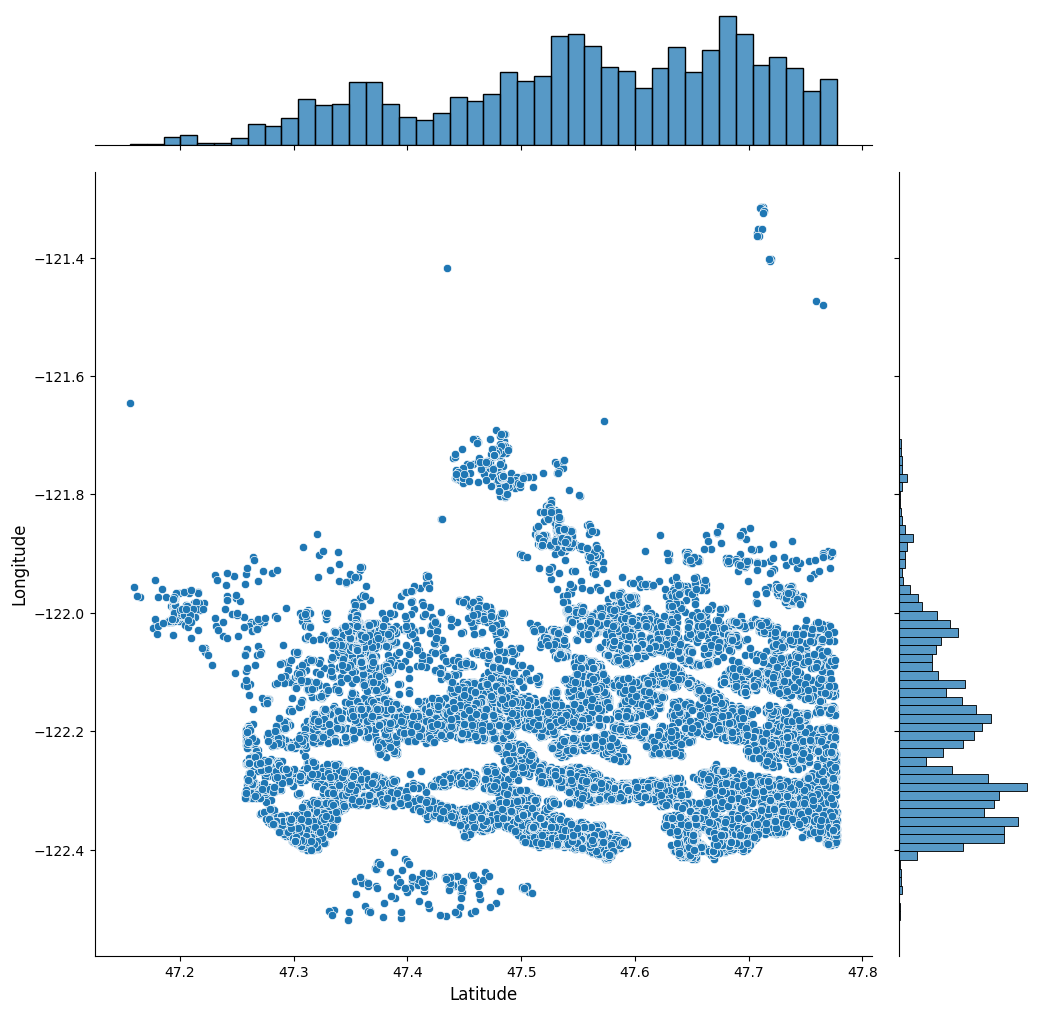

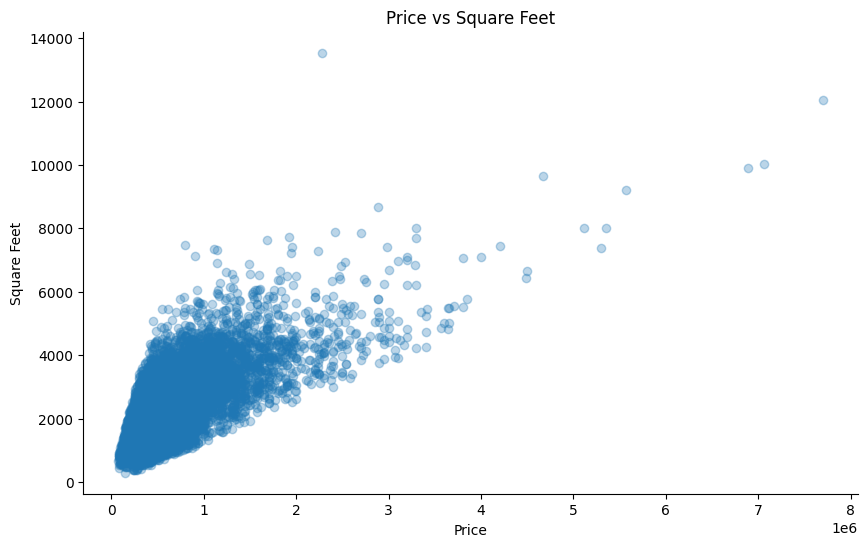

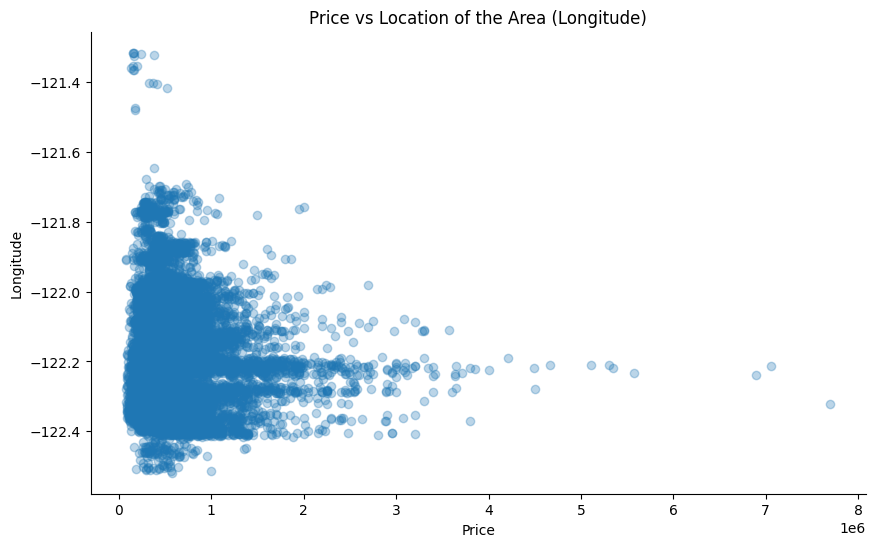

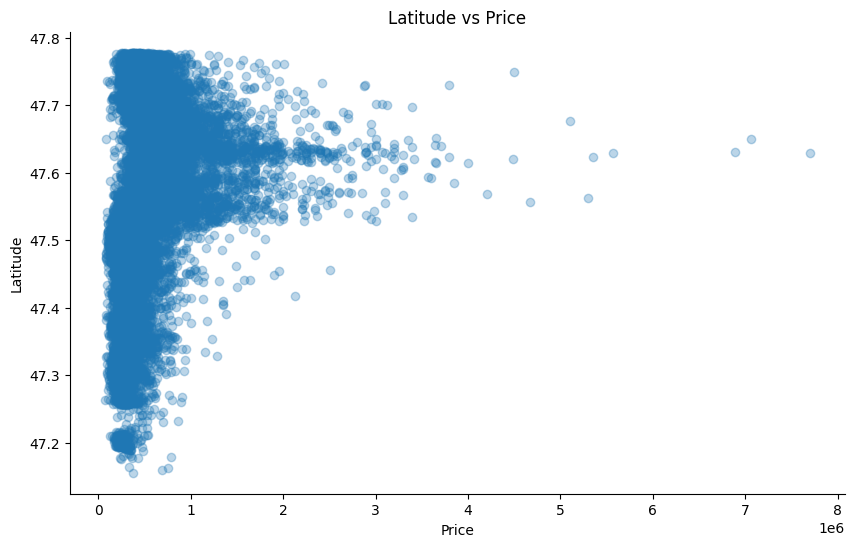

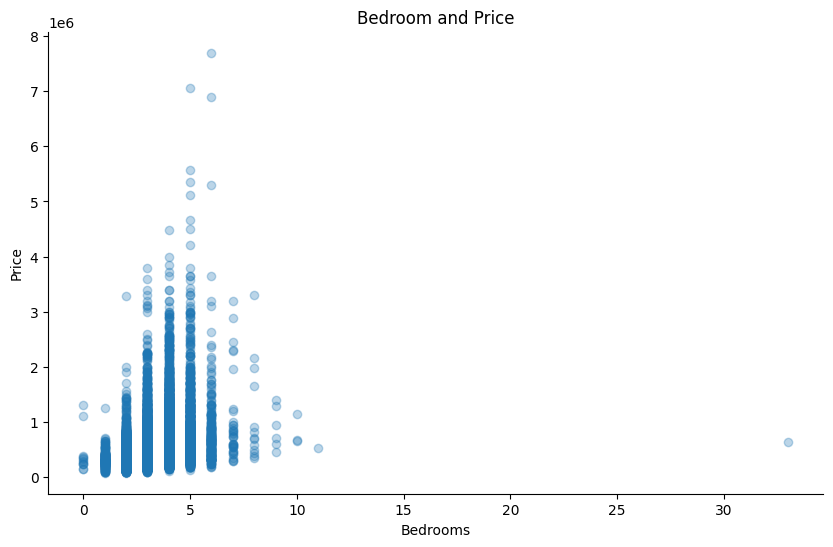

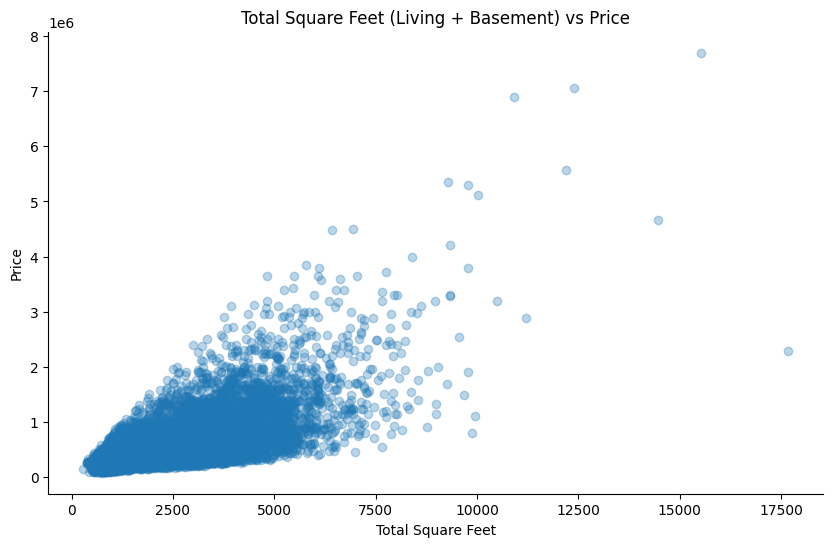

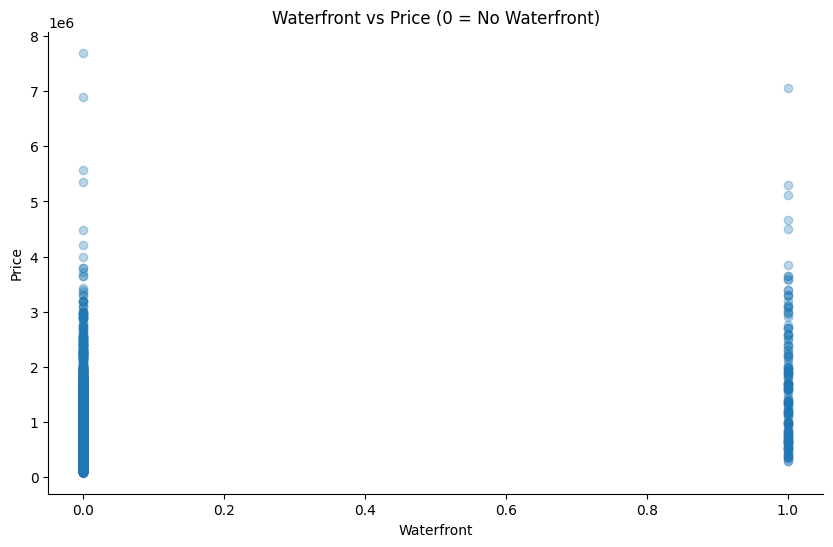

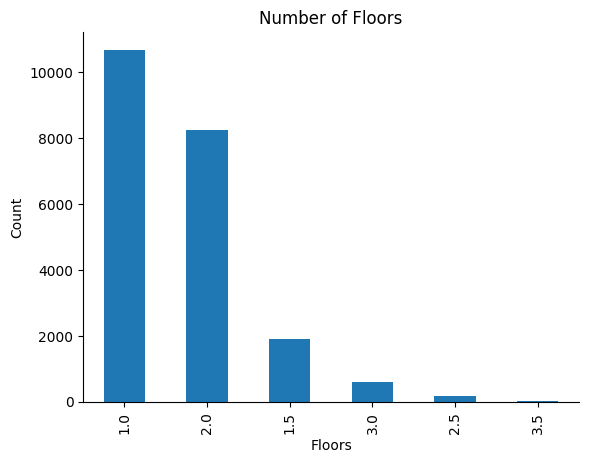

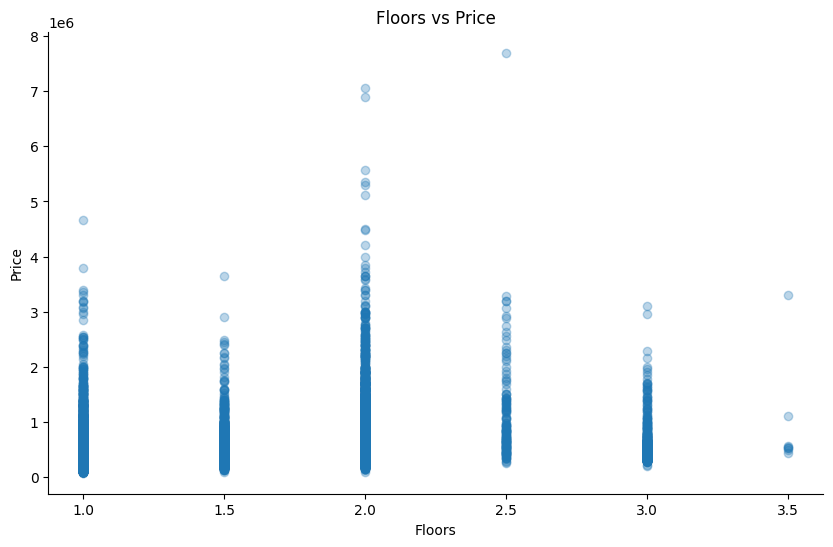

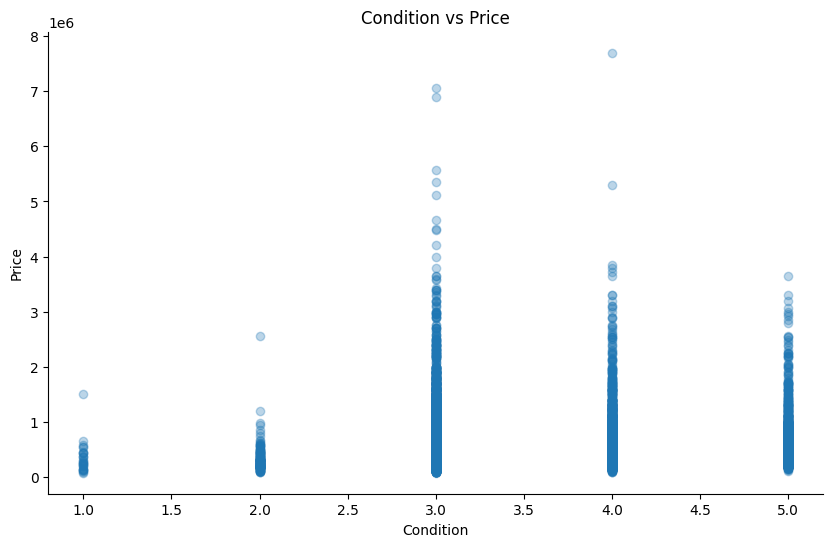

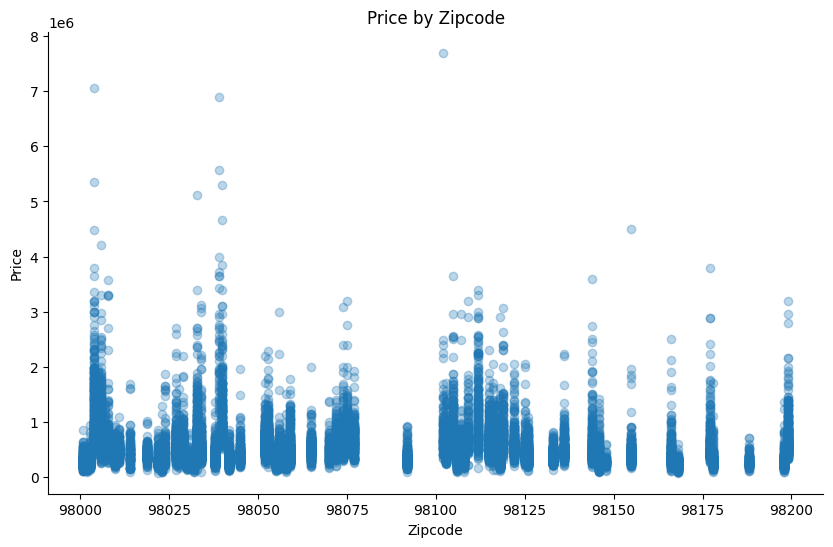

Model Accuracy (R^2 score): 0.7335984208484283


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Ensure that plots are displayed inline
%matplotlib inline

# Load the dataset
data = pd.read_csv("i2code.csv")

# Display the first few rows and statistics of the dataset
print(data.head())
print(data.describe())

# Plot the number of bedrooms
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine()
plt.show()

# Plot latitude vs longitude
plt.figure(figsize=(10, 10))
sns.jointplot(x=data.lat.values, y=data.long.values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

# Plot price vs square feet
plt.figure(figsize=(10, 6))
plt.scatter(data.price, data.sqft_living, alpha=0.3)
plt.title("Price vs Square Feet")
plt.xlabel("Price")
plt.ylabel("Square Feet")
sns.despine()
plt.show()

# Plot price vs location of the area
plt.figure(figsize=(10, 6))
plt.scatter(data.price, data.long, alpha=0.3)
plt.title("Price vs Location of the Area (Longitude)")
plt.xlabel("Price")
plt.ylabel("Longitude")
sns.despine()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data.price, data.lat, alpha=0.3)
plt.title("Latitude vs Price")
plt.xlabel("Price")
plt.ylabel("Latitude")
sns.despine()
plt.show()

# Plot bedroom vs price
plt.figure(figsize=(10, 6))
plt.scatter(data.bedrooms, data.price, alpha=0.3)
plt.title("Bedroom and Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
sns.despine()
plt.show()

# Plot sqft living + sqft basement vs price
plt.figure(figsize=(10, 6))
plt.scatter((data['sqft_living'] + data['sqft_basement']), data['price'], alpha=0.3)
plt.title("Total Square Feet (Living + Basement) vs Price")
plt.xlabel("Total Square Feet")
plt.ylabel("Price")
sns.despine()
plt.show()

# Plot waterfront vs price
plt.figure(figsize=(10, 6))
plt.scatter(data.waterfront, data.price, alpha=0.3)
plt.title("Waterfront vs Price (0 = No Waterfront)")
plt.xlabel("Waterfront")
plt.ylabel("Price")
sns.despine()
plt.show()

# Drop irrelevant columns and prepare the dataset for training
train1 = data.drop(['id', 'price'], axis=1)

# Encode the date column
data['date'] = data['date'].apply(lambda x: 1 if '2014' in x else 0)

# Plot floors vs price
data.floors.value_counts().plot(kind='bar')
plt.title('Number of Floors')
plt.xlabel('Floors')
plt.ylabel('Count')
sns.despine()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data.floors, data.price, alpha=0.3)
plt.title("Floors vs Price")
plt.xlabel("Floors")
plt.ylabel("Price")
sns.despine()
plt.show()

# Plot condition vs price
plt.figure(figsize=(10, 6))
plt.scatter(data.condition, data.price, alpha=0.3)
plt.title("Condition vs Price")
plt.xlabel("Condition")
plt.ylabel("Price")
sns.despine()
plt.show()

# Plot zipcode vs price
plt.figure(figsize=(10, 6))
plt.scatter(data.zipcode, data.price, alpha=0.3)
plt.title("Price by Zipcode")
plt.xlabel("Zipcode")
plt.ylabel("Price")
sns.despine()
plt.show()

# Prepare features and labels
labels = data['price']
features = data.drop(['id', 'price'], axis=1)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.10, random_state=2)

# Create and train the linear regression model
reg = LinearRegression()
reg.fit(x_train, y_train)

# Evaluate the model
accuracy = reg.score(x_test, y_test)
print(f"Model Accuracy (R^2 score): {accuracy}")


           id  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520     0  221900.0         3       1.00         1180      5650   
1  6414100192     0  538000.0         3       2.25         2570      7242   
2  5631500400     0  180000.0         2       1.00          770     10000   
3  2487200875     0  604000.0         4       3.00         1960      5000   
4  1954400510     0  510000.0         3       2.00         1680      8080   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     2.0           0     0  ...      7        2170            400      1951   
2     1.0           0     0  ...      6         770              0      1933   
3     1.0           0     0  ...      7        1050            910      1965   
4     1.0           0     0  ...      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


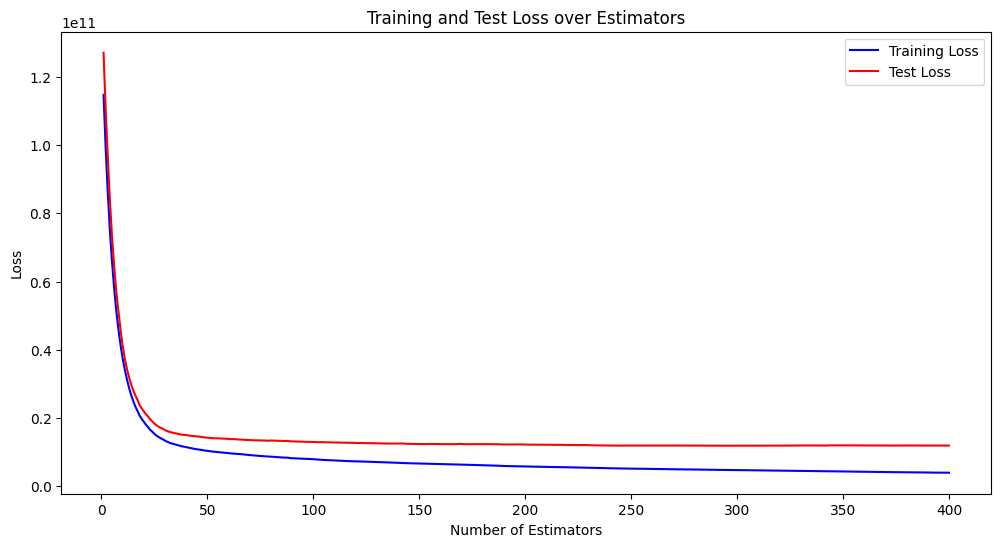

Explained Variance by each Principal Component:
[2.90500720e-01 1.22297475e-01 1.02491338e-01 7.58799060e-02
 6.69731973e-02 5.57211658e-02 4.85131580e-02 4.64555438e-02
 3.65219068e-02 3.33947485e-02 2.77011748e-02 2.24707490e-02
 1.80460152e-02 1.58509076e-02 1.40611673e-02 1.25581472e-02
 1.05626800e-02 1.86557030e-33 0.00000000e+00]


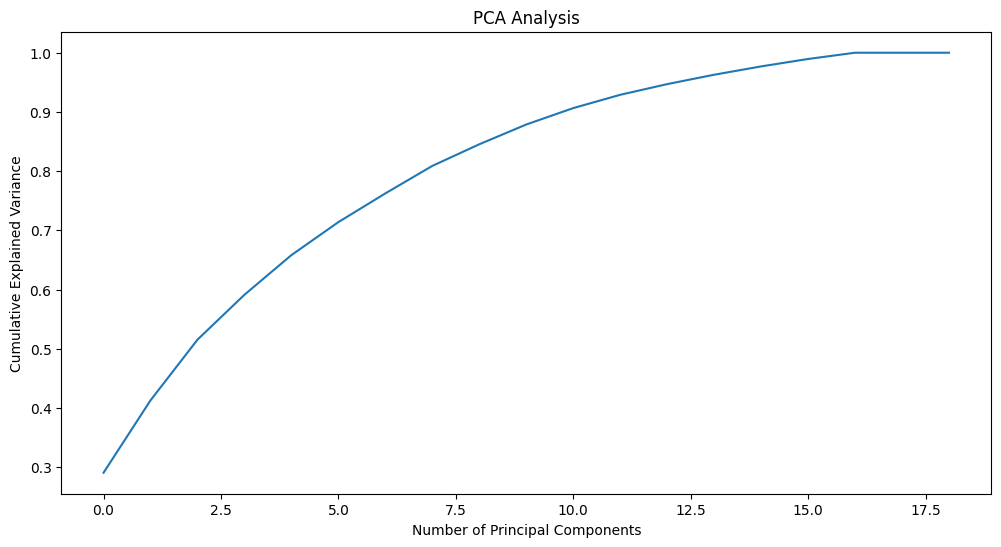

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Ensure that plots are displayed inline
%matplotlib inline

# Load the new dataset
data = data
# Display the first few rows and statistics of the dataset
print(data.head())
print(data.describe())

# Encode the date column if necessary
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    data['date'] = data['date'].apply(lambda x: 1 if x.year == 2014 else 0)

# Drop irrelevant columns and prepare the dataset for training
labels = data['price']
features = data.drop(['id', 'price'], axis=1)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.10, random_state=2)

# Create and train the Gradient Boosting Regressor model
clf = GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2,
                                learning_rate=0.1, loss='squared_error')
clf.fit(x_train, y_train)

# Evaluate the Gradient Boosting Regressor model
accuracy = clf.score(x_test, y_test)
print(f"Gradient Boosting Regressor Accuracy (R^2 score): {accuracy}")

# Track the training and test loss over each stage
n_estimators = clf.n_estimators
test_sc = np.zeros((n_estimators,), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(x_test)):
    test_sc[i] = clf.loss_(y_test, y_pred)

# Plot the training and test loss
plt.figure(figsize=(12, 6))
plt.plot(np.arange(n_estimators) + 1, clf.train_score_, 'b-', label='Training Loss')
plt.plot(np.arange(n_estimators) + 1, test_sc, 'r-', label='Test Loss')
plt.xlabel('Number of Estimators')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Estimators')
plt.legend()
plt.show()



In [25]:
# Perform PCA
pca = PCA()
scaled_features = scale(features)
pca_result = pca.fit_transform(scaled_features)

# Display the PCA results
print("Explained Variance by each Principal Component:")
print(pca.explained_variance_ratio_)



Explained Variance by each Principal Component:
[2.90500720e-01 1.22297475e-01 1.02491338e-01 7.58799060e-02
 6.69731973e-02 5.57211658e-02 4.85131580e-02 4.64555438e-02
 3.65219068e-02 3.33947485e-02 2.77011748e-02 2.24707490e-02
 1.80460152e-02 1.58509076e-02 1.40611673e-02 1.25581472e-02
 1.05626800e-02 1.86557030e-33 0.00000000e+00]


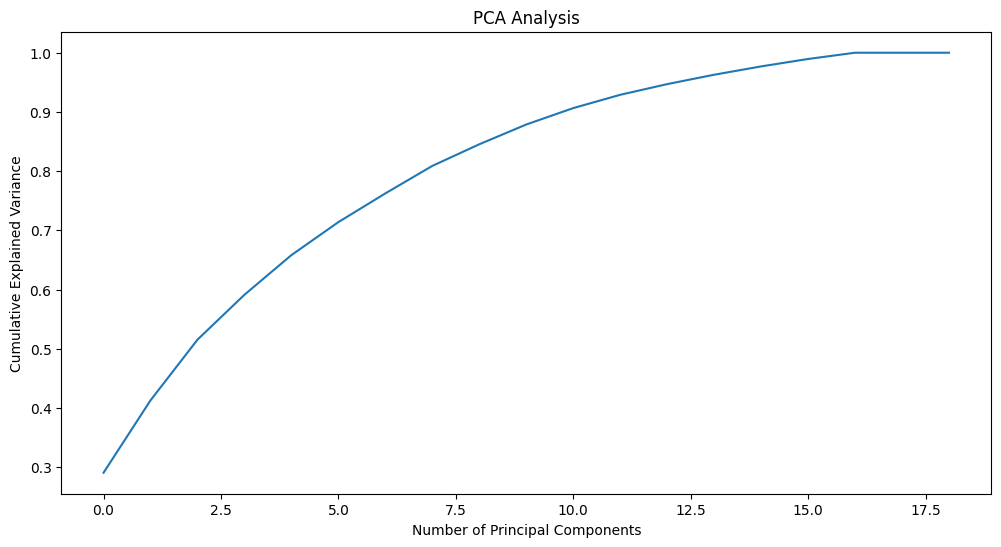

In [24]:
# Plot the cumulative explained variance
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Analysis')
plt.show()

# New section